In [1]:
# import and use library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# model evaloation and train
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
# load data and change format
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
wf = [col for col in df.columns if 'worst' in col]
newf = wf + ['target']
df = df[newf]
df.columns = df.columns.str.replace('worst ', '', regex=False)

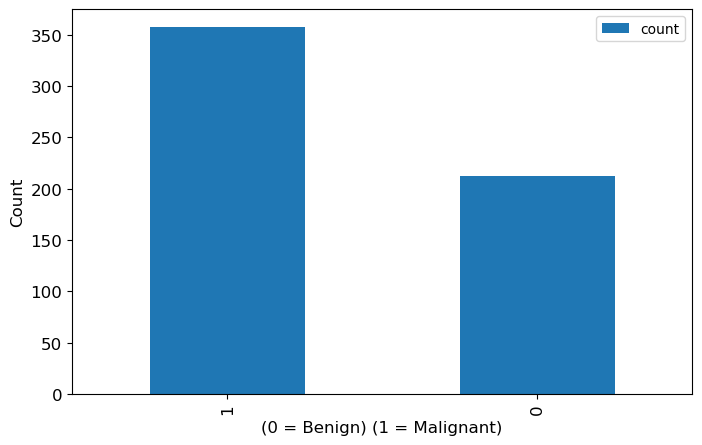

In [3]:
# shape 1  Target value count
df['target'].value_counts().plot(kind="bar", legend=1, figsize=(8, 5))
plt.xlabel("(0 = Benign) (1 = Malignant)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [4]:
# radius describe
df['radius'].describe()

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius, dtype: float64

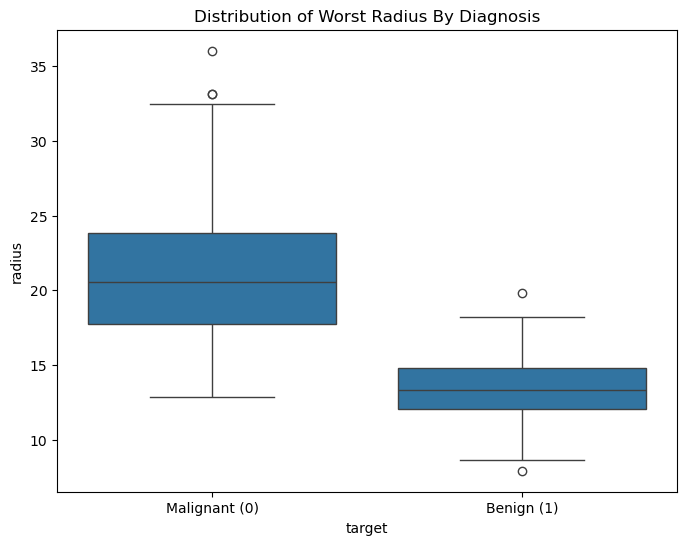

In [5]:
# shape 2 Distribution of Worst Radius By Diagnosis
plt.figure(figsize=(8, 6))

sns.boxplot(x='target', y='radius', data=df)
plt.title("Distribution of Worst Radius By Diagnosis")
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])
plt.show()

In [6]:
# drop target
df.drop('target', axis=1)

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# correlation
corr_matrix = df.drop('target', axis=1).corr().abs()
corr_matrix

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
radius,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
texture,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122
perimeter,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
area,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
smoothness,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624
compactness,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
concavity,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
concave points,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
symmetry,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848
fractal dimension,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000


In [8]:
# upper tiangel
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
radius,NaN,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
texture,NaN,NaN,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122
perimeter,NaN,NaN,NaN,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
area,NaN,NaN,NaN,NaN,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
smoothness,NaN,NaN,NaN,NaN,NaN,0.568187,0.518523,0.547691,0.493838,0.617624
compactness,NaN,NaN,NaN,NaN,NaN,NaN,0.892261,0.801080,0.614441,0.810455
concavity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.855434,0.532520,0.686511
concave points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502528,0.511114
symmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537848
fractal dimension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
to_drop = [ column for column in upper.columns if any(upper[column] > 0.88)]
to_drop

['perimeter', 'area', 'concavity']

In [10]:
df_reduced = df.drop(columns=to_drop)
df_reduced

,radius,texture,smoothness,compactness,concave points,symmetry,fractal dimension,target
0,25.380,17.33,0.16220,0.66560,0.2654,0.4601,0.11890,0
1,24.990,23.41,0.12380,0.18660,0.1860,0.2750,0.08902,0
2,23.570,25.53,0.14440,0.42450,0.2430,0.3613,0.08758,0
3,14.910,26.50,0.20980,0.86630,0.2575,0.6638,0.17300,0
4,22.540,16.67,0.13740,0.20500,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...
564,25.450,26.40,0.14100,0.21130,0.2216,0.2060,0.07115,0
565,23.690,38.25,0.11660,0.19220,0.1628,0.2572,0.06637,0
566,18.980,34.12,0.11390,0.30940,0.1418,0.2218,0.07820,0
567,25.740,39.42,0.16500,0.86810,0.2650,0.4087,0.12400,0


In [11]:
print("Original shape:", df.shape)
print("Reduced shape:", df_reduced.shape)

Original shape: (569, 11)
Reduced shape: (569, 8)


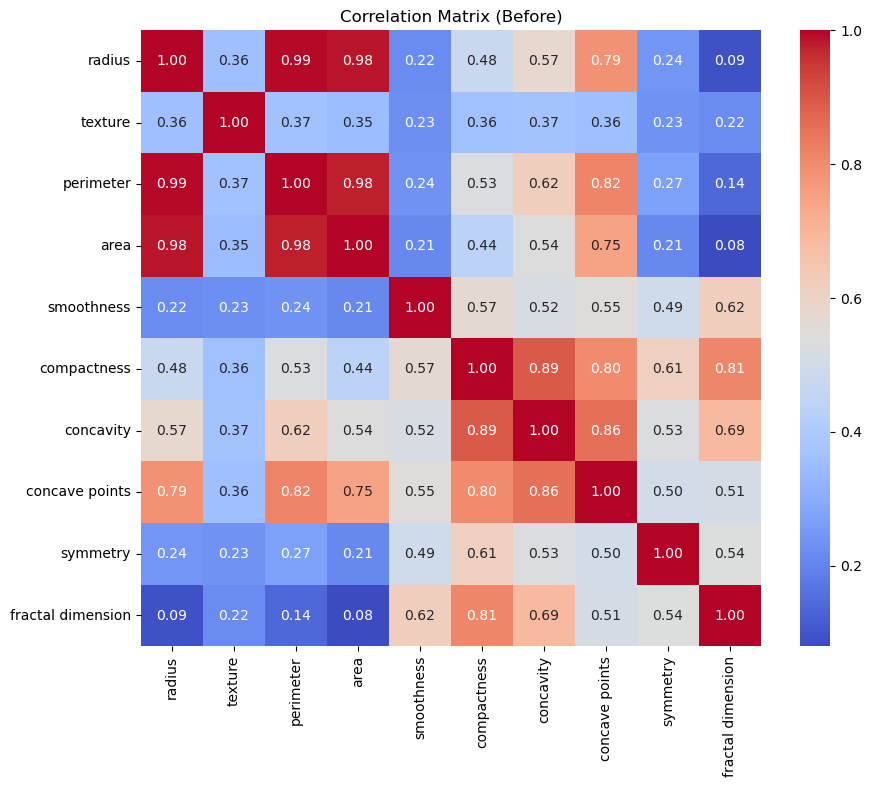

In [12]:
# Visualization of the correlation matrix Before dropping
# shape 3 Correlation Matrix (Before)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Before)")
plt.show()

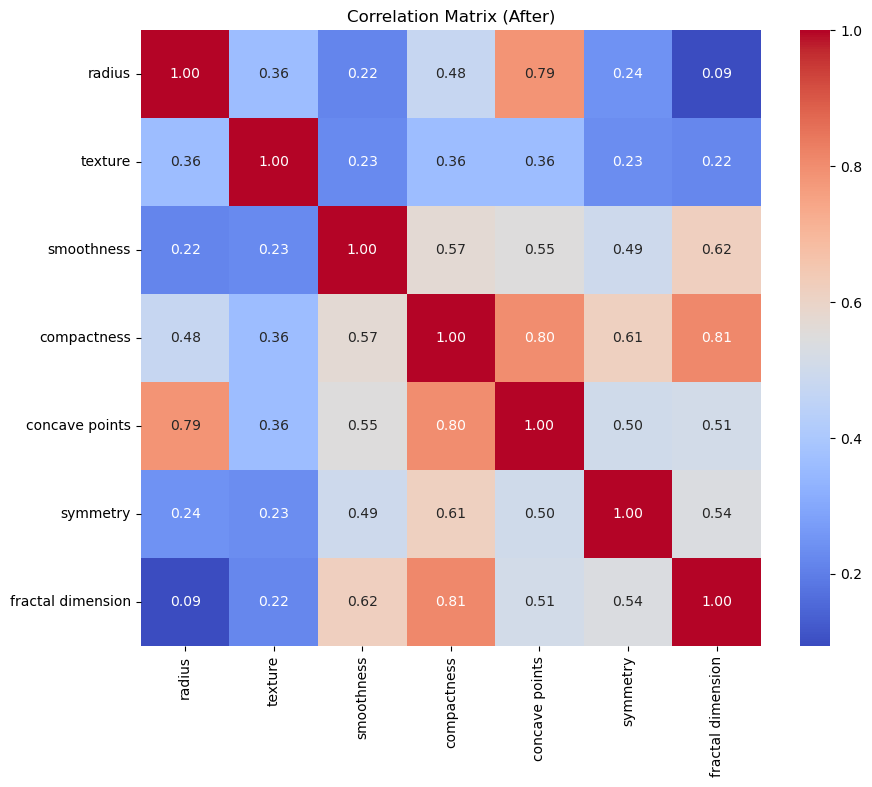

In [13]:
# Visualization of the correlation matrix AFTER dropping
# shape 4 Correlation Matrix (After) 
plt.figure(figsize=(10, 8))
X_reduced = df_reduced.drop('target', axis=1)
sns.heatmap(X_reduced.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (After)")
plt.show()

In [14]:
# model evalation
X = df_reduced.drop("target", axis=1)
y = df_reduced['target']

In [15]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((455, 7), (114, 7))

In [16]:
# Feature scaling (Crucial for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# model Building (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [20]:
# prediction
y_pred = model.predict(X_test_scaled)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [24]:
print(y_test.to_numpy())

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  2]
 [ 2 69]]


In [28]:
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

41 2 2 69


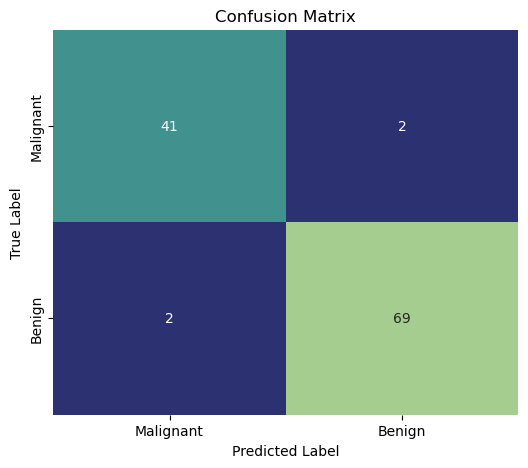

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["Malignant", "Benign"])
plt.yticks([0.5, 1.5], ["Malignant", "Benign"])
plt.show()